# references
https://plot.ly/ipython-notebooks/cufflinks/

https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

In [5]:
# use plotly.offline.iplot() to plot offline.
# below initialize the notebook mode
# import plotly
# import plotly.graph_objs as go

# plotly.offline.init_notebook_mode(connected=True)
# Standard plotly imports
import chart_studio.plotly as py
import pandas as pd
import numpy as np
# import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
# cufflinks binds plotly directly to python dataframe
import cufflinks as cf
cf.go_offline()
# Set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
# plotly.offline.init_notebook_mode(connected=True)


# to enable jupyter ipython widgets run following line at command line
# jupyter nbextension enable --py widgetsnbextension
# to import ipywidgets in jupyter notebook
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [1]:
from bokeh.core.properties import value
from bokeh.io import show, output_file, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure

# output_file("bar_stacked_grouped.html")

factors = [
    ("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"),
    ("Q2", "apr"), ("Q2", "may"), ("Q2", "jun"),
    ("Q3", "jul"), ("Q3", "aug"), ("Q3", "sep"),
    ("Q4", "oct"), ("Q4", "nov"), ("Q4", "dec"),

]

regions = ['east', 'west']

source = ColumnDataSource(data=dict(
    x=factors,
    east=[ 5, 5, 6, 5, 5, 4, 5, 6, 7, 8, 6, 9 ],
    west=[ 5, 7, 9, 4, 5, 4, 7, 7, 7, 6, 6, 7 ],
))

p = figure(x_range=FactorRange(*factors), plot_height=250,
           toolbar_location=None, tools="")

p.vbar_stack(regions, x='x', width=0.9, alpha=0.5, color=["blue", "red"], source=source,
             legend=[value(x) for x in regions])

p.y_range.start = 0
p.y_range.end = 18
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
p.legend.location = "top_center"
p.legend.orientation = "horizontal"
output_notebook()
show(p)

Loading BokehJS ...

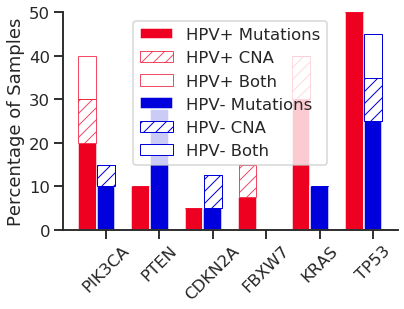

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# make up some fake data
pos_mut_pcts = np.array([20, 10, 5, 7.5, 30, 50])
pos_cna_pcts = np.array([10, 0, 0, 7.5, 10, 0])
pos_both_pcts = np.array([10, 0, 0, 0, 0, 0])
neg_mut_pcts = np.array([10, 30, 5, 0, 10, 25])
neg_cna_pcts = np.array([5, 0, 7.5, 0, 0, 10])
neg_both_pcts = np.array([0, 0, 0, 0, 0, 10])
genes = ['PIK3CA', 'PTEN', 'CDKN2A', 'FBXW7', 'KRAS', 'TP53']

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
    # plot details
    bar_width = 0.35
    epsilon = .015
    line_width = 1
    opacity = 0.7
    pos_bar_positions = np.arange(len(pos_mut_pcts))
    neg_bar_positions = pos_bar_positions + bar_width

    # make bar plots
    hpv_pos_mut_bar = plt.bar(pos_bar_positions, pos_mut_pcts, bar_width,
                              color='#ED0020',
                              label='HPV+ Mutations')
    hpv_pos_cna_bar = plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                              bottom=pos_mut_pcts,
                              alpha=opacity,
                              color='white',
                              edgecolor='#ED0020',
                              linewidth=line_width,
                              hatch='//',
                              label='HPV+ CNA')
    hpv_pos_both_bar = plt.bar(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
                               bottom=pos_cna_pcts+pos_mut_pcts,
                               alpha=opacity,
                               color='white',
                               edgecolor='#ED0020',
                               linewidth=line_width,
                               hatch='0',
                               label='HPV+ Both')
    hpv_neg_mut_bar = plt.bar(neg_bar_positions, neg_mut_pcts, bar_width,
                              color='#0000DD',
                              label='HPV- Mutations')
    hpv_neg_cna_bar = plt.bar(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                              bottom=neg_mut_pcts,
                              color="white",
                              hatch='//',
                              edgecolor='#0000DD',
                              ecolor="#0000DD",
                              linewidth=line_width,
                              label='HPV- CNA')
    hpv_neg_both_bar = plt.bar(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
                               bottom=neg_cna_pcts+neg_mut_pcts,
                               color="white",
                               hatch='0',
                               edgecolor='#0000DD',
                               ecolor="#0000DD",
                               linewidth=line_width,
                               label='HPV- Both')
    plt.xticks(neg_bar_positions, genes, rotation=45)
    plt.ylabel('Percentage of Samples')
    plt.legend(loc='best')
    sns.despine()
    plt.show()

In [6]:
of = '/projects/trans_scratch/validations/workspace/szong/development/ds/group_stack_test.csv'
dff = pd.read_csv(of, index_col=0)
dff.head(2)

from bokeh.core.properties import value
from bokeh.io import show, output_file, output_notebook, export_png, export_svgs
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure

output_file("bar_stacked_grouped.html")


hivpos = dff[['dis_HIV_pos', 'val_HIV_pos']].values.flatten()
hivneg = dff[['dis_HIV_neg', 'val_HIV_neg']].values.flatten()
factors = [(i, a) for i in genes for a in ['dis', 'val'] ]
regions = ['hivpos', 'hivneg']

source = ColumnDataSource(data=dict(
    x=factors,
    hivpos=hivpos,
    hivneg=hivneg
))

p = figure(x_range=FactorRange(*factors), plot_height=250, plot_width=800,
           toolbar_location=None, tools="")

p.vbar_stack(regions, x='x', width=0.9, alpha=0.5, color=["red", "blue"], source=source,
             legend=[value(x) for x in regions])

p.y_range.start = 0
p.y_range.end = .4
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
p.legend.location = "top_center"
p.legend.orientation = "horizontal"
output_notebook()
show(p)
# export_png(p, filename="plot.png")


p.output_backend = "svg"
export_svgs(p, filename="SMGs_frequency_discovery_validation_20191017.svg")

,dis_HIV_pos,dis_HIV_neg,val_HIV_pos,val_HIV_neg
PIK3CA,0.177966,0.169492,0.033708,0.292135
FAT1,0.101695,0.084746,0.011236,0.112360


/projects/da_workspace/software/miniconda/envs/da/lib/python3.7/site-packages/bokeh/models/sources.py:172: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('hivneg', 24), ('hivpos', 24), ('x', 12)



[GlyphRenderer(id='1136', ...), GlyphRenderer(id='1149', ...)]

Loading BokehJS ...

KeyboardInterrupt: 

In [38]:
### use ipython interact widgets to dynamically plot data

f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms.csv'
df = pd.read_csv(f)
df.head(2)
@interact
def box_plot(col=list(df.columns), 
             theme=list(cf.themes.THEMES.keys()), 
             colorscale=list(cf.colors._scales_names.keys())):
    data = go.Box(y=df[col], name=col, boxpoints='all', pointpos=0, jitter=1, text=df[col].index.tolist()) 

    layout = go.Layout(title=col, width=600, height=600)
    fig = go.Figure(data=[data], layout=layout)
    iplot(fig)  

,Unnamed: 0,ARFGAP3,KLF12,LRP1B,MYC,NEGR1,NFKB1,NFKB2,POU5F1B,SCAF11,STK11
0,HTMCP-03-06-02001,19.5059,1.2406,0.0591,44.4223,0.1510,28.2237,25.3240,0.0614,8.1612,7.7324
1,HTMCP-03-06-02002,15.5748,0.3155,0.0177,47.1335,0.0664,24.0621,11.3559,0.1385,8.6626,3.7501


interactive(children=(Dropdown(description='col', options=('Unnamed: 0', 'ARFGAP3', 'KLF12', 'LRP1B', 'MYC', '…

# example plot for Rainstorm non-coding hotspots

In [9]:
of = 'hotspots.csv'
# df.to_csv(of, index=False)
df = pd.read_csv(of)

In [11]:
point_layers = []
# loop through all variant types and append the points to point_layers for plotting
for var_type in df.mostFreqVClassification.unique():
    df_sub = df[df.mostFreqVClassification == var_type]
    trace0 = go.Scatter(
        x = df_sub['hotspot_length'],
        y = df_sub['numberPatients'],
        name = var_type, # legend
        mode = 'markers',
        text = df_sub['Hugo_Symbol']) # The hover text goes here... 
    point_layers.append(trace0);

layout = go.Layout(title= 'Rainstorm hotspots',
                  hovermode= 'closest',
                  autosize=False,
                  width=600,
                  height=400,
                  xaxis=dict(title= 'hotspot length',
                              ticklen= 5,
                              zeroline= False,
                              gridwidth= 1),
                  yaxis=dict(title= 'number of mutated patients',
                             ticklen= 5,
                             gridwidth= 1),
                  showlegend=True)

fig = go.Figure(data=point_layers, layout=layout)
iplot(fig)

In [32]:
### plotly boxplot overlay boxpoints

f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/GPR126_expression.csv'
df = pd.read_csv(f)
df.head(2)
dfm = df.pivot(index='patient', columns='xx', values='GPR126')
dfm.columns = ['mut', 'wt']
dfm.head(2)

data=[go.Box(y=dfm[col], name=col, boxpoints='all', pointpos = 0, jitter=1, text=dfm[col].index.tolist()) for col in dfm.columns]

layout=go.Layout(title='expression of gpr126',
                width=600,
                height=600)

fig = go.Figure(data=data, layout=layout)

iplot(fig)                                              
                                                  

,patient,GPR126,mut_status,xx
0,HTMCP-03-06-02001,11.1634,False,2
1,HTMCP-03-06-02002,1.8584,False,2


,mut,wt
patient,,
HTMCP-03-06-02001,NaN,11.1634
HTMCP-03-06-02002,NaN,1.8584


In [33]:
### plotly grouped barplot
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/gene_frequency.txt'
df = pd.read_csv(f)

trace1 = go.Bar(x=df.gene,
                y=df.mutation_frequency_x,
                name='HTMCP discovery')
trace2 = go.Bar(x=df.gene,
                y=df.mutation_frequency_y,
                name='HTMCP validation')

data = [trace1, trace2]
layout = go.Layout(barmode='group',
                   width=700,
                   height=500,
                  yaxis=dict(type='-', title='mutation frequency'),
                  xaxis=dict(title=''))

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='xxx.png')

In [34]:
### plotly plot boxplot with all boxpoint, use grouped boxplots
### currently don't know how to color points based on additional categorical variables
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms_long.csv'

df = pd.read_csv(f)
data = []
genes = df.gene.unique()
clrs = ['#3D9970', '#FF851B']
int_status = df.integration.unique()
int_status

for i, c in zip(int_status, clrs):
    dftmp = df[df.integration==i]
    bi = [go.Box(y=dftmp['rpkm'], 
           x=dftmp['gene'],
           name=i,
           marker=dict(color=c),
           boxpoints='all',
           pointpos=0,
           jitter=.4,
           text=dftmp['patient'])]
    data += bi

layout=go.Layout(title='expression',
                width=800,
                height=400,
                yaxis=dict(type='log', autorange=True),
                boxmode='group',
                boxgroupgap=0.1,
                boxgap=0.2)

fig = go.Figure(data=data, layout=layout)

iplot(fig) 

array(['wt', 'integrated'], dtype=object)

In [35]:
### plotly plot boxplot with all boxpoints
f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms_long.csv'
# f = '/projects/trans_scratch/validations/workspace/szong/development/genomics_data_analysis/visualization/rpkms.csv'
df = pd.read_csv(f)
data=[go.Box(y=df[df.gene==col]['rpkm'], 
             name=col, boxpoints='all', 
             pointpos = 0, 
             jitter=.25, 
             
             text=df[df.gene==col]['patient']) for col in df.gene.unique()]

layout=go.Layout(title='expression',
                width=600,
                height=400,
                yaxis=dict(type='log', autorange=True))

fig = go.Figure(data=data, layout=layout)

iplot(fig) 

In [13]:
# this plot is useful for data exploring since we could hover over to see the point label and x/y values
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")
data[:3]

data.State[:2]

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0


0    Alabama
1     Alaska
Name: State, dtype: object

In [17]:
c

['hsl(0.0,50%,50%)', 'hsl(360.0,50%,50%)']

In [16]:
# Setting colors for plot.
points = []
y = []
N = 2
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((2000+i))
    trace0 = go.Scatter(x=data['Rank'],
                        y=data['Population']+(i*1000000),
                        mode='markers',
                        marker=dict(size=14,
                                     line=dict(width=1),
                                     color=c[i],
                                     opacity=0.8),
                        name=y[i], # legend labels
                        text=data['State']) # The hover text goes here... 
    points.append(trace0);

    layout = go.Layout(title='Stats of USA States',
                      hovermode='closest',
                       width=600,
                       height=600,
                      xaxis=dict(title='Population',
                                  ticklen=5,
                                  zeroline=False,
                                  gridwidth=2),
                      yaxis=dict(title='Rank',
                                 ticklen=5,
                                 gridwidth=2),
                      showlegend=True)
    
fig = go.Figure(data=points, layout=layout)

iplot(fig)

In [26]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import chart_studio.plotly as py
import pandas as pd
import plotly

plotly.offline.init_notebook_mode(connected=True)
df = pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', sep='\t')
# df2007 = df[df.year==2007]
# df1952 = df[df.year==1952]
df.head(2)

fig = {
    'data': [
        {
            'x': df[df['year']==year]['gdpPercap'],
            'y': df[df['year']==year]['lifeExp'],
            'name': year, 'mode': 'markers',
        } for year in [1952, 1982, 2007]
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}

# IPython notebook
plotly.offline.iplot(fig, filename='pandas/grouped-scatter')

# url = py.plot(fig, filename='pandas/grouped-scatter')



,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030


In [26]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [25]:
import random
import chart_studio.plotly as py
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)
from numpy import * 

N = 30.     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 
# Plotly accepts any CSS color format, see e.g. http://www.w3schools.com/cssref/css_colors_legal.asp.
c = ['hsl('+str(h)+',50%'+',50%)' for h in linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': 3.5*sin(pi * i/N) + i/N+(1.5+0.5*cos(pi*i/N))*random.rand(10), 
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(int(N))]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

# py.iplot(data)
plotly.offline.iplot(data)

/projects/da_workspace/software/miniconda/envs/da/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



In [27]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")
df[:3]
table = ff.create_table(df)
table
py.iplot(table, filename='jupyter-table1')

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53


KeyboardInterrupt: 

# example plotly plots

In [28]:
of = '/home/szong/projects/development/2014_usa_states.csv'
# df.to_csv(of, index=False)
df = pd.read_csv(of)
df.head(2)
# df['pop_k'] = df.Population/3

,Rank,State,Postal,Population,pop_k,pseudo_group,ratio
0,1,Alabama,AL,4849377,2424.6885,east,18
1,2,Alaska,AK,736732,368.3660,east,18


In [29]:
df['Population'].iplot(kind='hist', 
                       xTitle='population',
                       yTitle='count', 
#                        image_width=800,
#                        image_height=400,
                       title='population Distribution')


In [30]:
df[['Population', 'pop_k']].iplot(kind='hist',
                                  histnorm='percent',
                                  barmode='overlay',
                                  xTitle='Time of Day',
                                  yTitle='(%) of Articles',
                                  title='Time Started and Time Published')

In [145]:
df[['Population', 'pop_k']].iplot(kind='bar', 
                                  xTitle='population', 
                                  yTitle='count',
                                  title='population in k')

In [146]:
df.pivot(columns='pseudo_group', values='Population')[:3]

pseudo_group,West,east,north,south
0,NaN,4849377.0,NaN,NaN
1,NaN,736732.0,NaN,NaN
2,NaN,6731484.0,NaN,NaN


In [147]:
df.pivot(columns='pseudo_group', values='Population').iplot(
        kind='box',
        yTitle='fans',
        title='Fans Distribution by Publication')

In [57]:
df.set_index('Rank')[['Population', 'pop_k', 'State']].iplot(
    y='Population', 
    mode='lines+markers', 
    secondary_y = 'pop_k',
    secondary_y_title='in thousand', 
    xTitle='rank', 
    yTitle='#persons',
    text='State', 
    title='Fans and Claps over Time')

In [52]:
df.set_index('Rank')[['Population', 'pop_k', 'State']].iplot(
    y='Population', 
    mode='lines+markers+text', secondary_y = 'pop_k',
    secondary_y_title='in thousand', xTitle='rank', yTitle='#persons',
    text='State', title='Fans and Claps over Time')

In [54]:
df.iplot(
    x='Population',
    y='pop_k',
    # Specify the category
    categories='pseudo_group',
    xTitle='population',
    yTitle='pop_k',
    title='population vs pop_k by pseudo_group')

In [88]:
df.head(2)
# df

,Rank,State,Postal,Population,pop_k,pseudo_group,ratio
0,1,Alabama,AL,4849377,2424.6885,east,2
1,2,Alaska,AK,736732,368.3660,east,2


In [31]:
df.iplot(
    x='Population',
    y='pop_k',
    size=df['ratio'],
    text='State',
    mode='markers',
    # log xaxis
    layout=dict(
        xaxis=dict(type='log', title='log population'),
        yaxis=dict(title='pop_k'),
        width=600,
        height=400,
        title='xxx'))

